# Root Finding by Interval Halving (Bisection)

**References:**
- Section 1.1 of *Numerical Analysis* by [Sauer](../references.html#Sauer)
- Section 2.1 of *Numerical Analysis* by [Burden&Faires](../references.html#Burden-Faires)

(See the [References](../references.ipynb).)

## Introduction

One of the most basic tasks in numerical computing is finding the roots (or "zeros") of a function — solving the equation $f(x) = 0$ where $f:\mathbb{R} \to \mathbb{R}$ is a continuous function from and to the real numbers.
As with many topics in this course, there are multiple methods that work, and we will often start with the simplest and then seek improvement in several directions:
- **reliability** or *robustness* — how good it is at avoiding problems in hard cases, such as division by zero.

- *accuracy* and guarantees about accuracy like estimates of how large the error can be — since in most cases, the result cannot be computed exactly.

- *speed* or *cost* — often measure by minimizing the amount of arithemtic involved, or the number of times that a function must be evaluated.

**Example 1:** Solve $x = \cos x$.
This is a simple equation for which there is no exact formula for a solution, but we can easily ensure that there is a solution, and moreover, a unique one.
It is convenient to put the equation into "zero-finding" form $f(x) = 0$, by defining

$$f(x) := x - \cos x.$$

Also, note that $|\cos x| \leq 1$, so a solution to the original equation must have $|x| \leq 1$.
So we will start graphing the function on the interval
$[a, b] = [-1, 1]$.

**Aside:** This is our first use of two Python packages that some of you might not have seen before: *Numpy* and *Matplotlib*.
If you want to learn more about them, see for example the Python Review sections on
[Python Variables, Lists, Tuples, and Numpy arrays](../python_tutorial/python-variables-lists-tuples-numpy-arrays.ipynb)
and
[Graphing with Matplotlib](../python_tutorial/graphing-with-matplotlib.ipynb)

Or for now, just learn from the examples here.

In [1]:
# We will often need resources from the modules numpy and pyplot:
import numpy as np
import matplotlib.pyplot as plt

# We can also import items from a module individually, so they can be used by "first name only".
# Here this is done for mathematical functions; in some later sections it will be done for all imports.
from numpy import cos

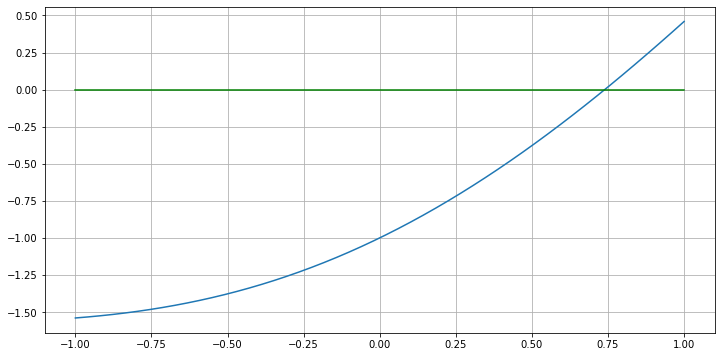

In [2]:
a = -1; b = 1
x = np.linspace(a, b)  #50 equally sapce valued from a to b
plt.figure(figsize=(12,6)) # Create an "empty" graph, 12 wide, 6 high
plt.plot(x, x - cos(x))
plt.plot([a, b], [0, 0], 'g')  # Mark the x-axis in green
plt.grid(True)  # Add a graph paper background

In [ ]:
# If you want to see what `linspace` gives, run this cell
print(x)

This shows that the zero lies between 0.5 and 0.75, so zoom in:

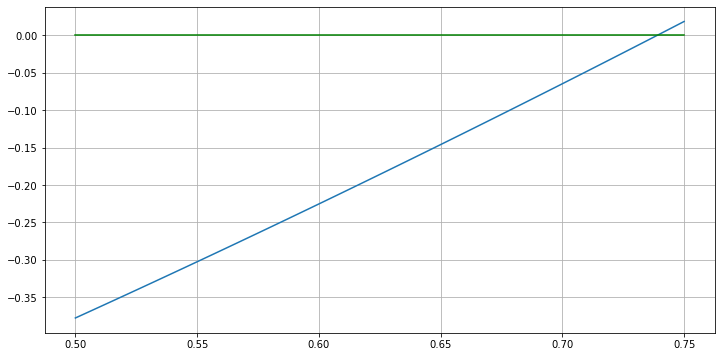

In [4]:
a = 0.5; b = 0.75
x = np.linspace(a, b)
plt.figure(figsize=(12,6))
plt.plot(x, x - cos(x))
plt.plot([a, b], [0, 0], 'g')
plt.grid(True)

And we could repeat, geting an approximation of any desired accuracy.

However this has two weaknesses: it is very inefficient (the function is evaluated about fifty times at each step in order to draw the graph), and it requires lots of human intervention.

To get a procedure that can be efficiently implemented in Python (or another programming language of your choice),
we extract one key idea here: finding an interval in which the function changes sign, and then repeatedly find a smaller such interval within it.
The simplest way to do this is to repeatedly divide an interval known to contain the root in half and check which half has the sign change in it.

Graphically, let us start again with interval $[a, b] = [-1, 1]$, but this time focus on three points of interest: the two ends and the midpoint, where the interval will be bisected:

In [5]:
a = -1
b = 1
c = (a+b)/2

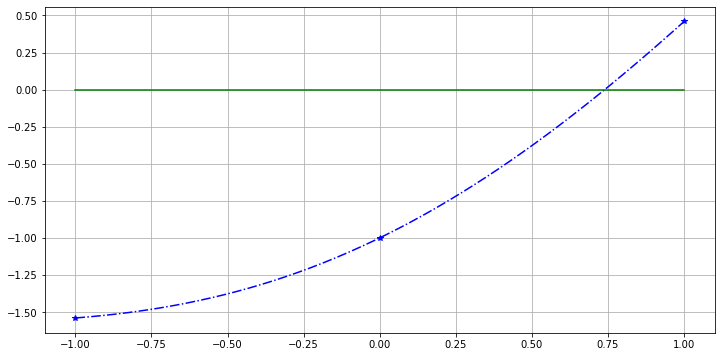

In [6]:
acb = [a, c, b]
plt.figure(figsize=(12,6))
plt.plot(acb, acb - cos(acb), 'b*')
# And just as a visual aid:
x = np.linspace(a, b)
plt.plot(x, x - cos(x), 'b-.')
plt.plot([a, b], [0, 0], 'g')
plt.grid(True)

**Aside on Numpy's math functions:** note on line 3 above  that the function `cos` from Numpy (full name `numpy.cos`) can be evaluated simultaneously on a list of numbers; the version `math.cos` from module `math` can only handle one number at a time.
This is one reason why we will avoid `math` in favor of `numpy`.

$f(a)$ and $f(c)$ have the same sign, while $f(c)$ and $f(b)$ have opposite signs, so the root is in $[c, b]$;
update the a, b, c values and plot again:

In [7]:
a = c  # new left end is old center
b = b  # redundant, as the right end is unchanged
c = (a+b)/2
print(a, b, c)

0.0 1 0.5


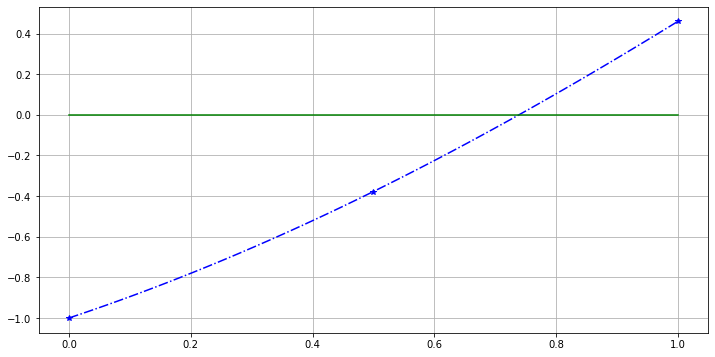

In [8]:
acb = [a, c, b]
x = np.linspace(a, b)
plt.figure(figsize=(12,6))
plt.plot(acb, acb - cos(acb), 'b*', x, x - cos(x), 'b-.')
plt.plot([a, b], [0, 0], 'g')
plt.grid(True)

Again $f(c)$ and $f(b)$ have opposite signs, so the root is in $[c, b]$, and ...

In [9]:
a = c  # new left end is old center again
# skipping the redundant "b = b" this time
c = (a+b)/2

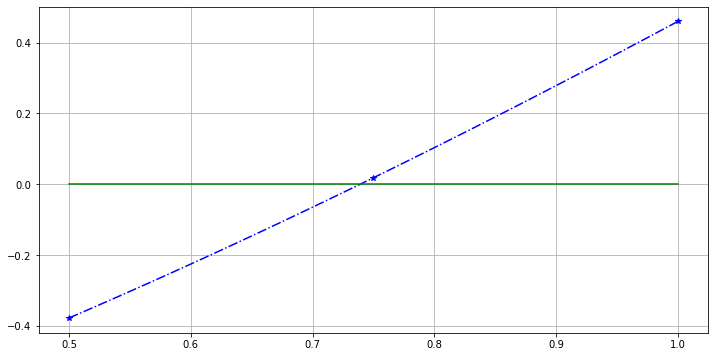

In [10]:
acb = [a, c, b]
x = np.linspace(a, b)
plt.figure(figsize=(12,6))
plt.plot(acb, acb - cos(acb), 'b*', x, x - cos(x), 'b-.')
plt.plot([a, b], [0, 0], 'g')
plt.grid(True)

This time $f(a)$ and $f(c)$ have opposite sign, so the root is at left, in $[a, c]$:

In [11]:
# this time, the value of a does not need to be updated ...
b = c  # ... and the new right end is the former center
c = (a+b)/2

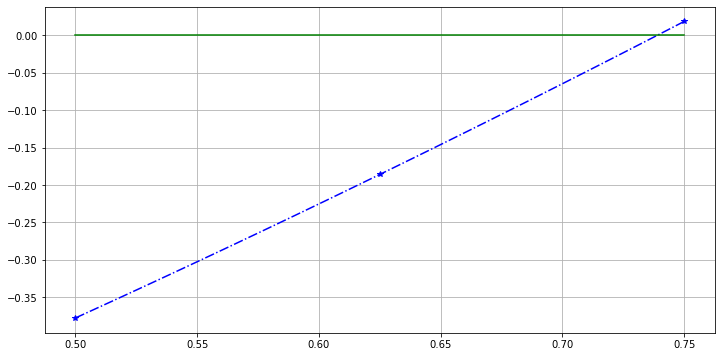

In [12]:
acb = [a, c, b]
x = np.linspace(a, b)
plt.figure(figsize=(12,6))
plt.plot(acb, acb - cos(acb), 'b*', x, x - cos(x), 'b-.')
plt.plot([a, b], [0, 0], 'g')
plt.grid(True)

## A first algorithm for the bisection method

Now it is time to dispense with the graphs, and describe the procedure in mathematical terms:
- if $f(a)$ and $f(c)$ have opposite signs, the root is in interval $[a, c]$, which becomes the new version of interval $[a, b]$.
- otherwise, $f(c)$ and $f(b)$ have opposite signs, so the root is in interval $[c, b]$

### Pseudo-code for describing algorithms

As a useful bridge from the mathematical desciption of an algorithm with words and formulas to actual executable code,
these notes will often describe algorithms in *pseudo-code* —
a mix of words and mathematical formulas with notation that somewhat resembles code in a language like Python.

This is also preferable to going straight to code in a particular language (such as Python) because it makes it easier if, later, you wish to implement algorithms in a different programming language.

Note well one feature of the pseudo-code used here:
**assignment** is denoted with a left arrow:

$x \leftarrow a$

is the instruction to cause the value of variable `x` to become the current value of a.

This is to distinguish from

$x = a$

which is a **comparison**: the true-or-false assertion that the two quantities _already_ have the same value.

Unfortunately however, Python (like most programming languages) does not use this notation:
instead assignment is done with `x = a` so that asserting equality needs a differnt notation:
this is done with `x == a`; note well that double equal sign!

Also, the pseudo-code marks the end of blocks like `if`, `for` and `while` with the lines `end if`, `end for`, `end while` and so on.
Many programming languages do something like this (or just use `end` for all blocks) but Python does not:
instead it uses only the end of indentation as the indication that a block is finished.

With those notational issues out of the way,
the key step in the bisection strategy is the update of the interval:

<br>$\displaystyle c \leftarrow \frac{a + b}{2}$
<br>if $f(a) f(c) < 0$ then:
<br>$\quad$ $b \leftarrow c$
<br>else:
<br>$\quad$ $a \leftarrow c$
<br>end if

This needs to be repeated a finite number of times, and the simplest way is to specify the number of iterations.
(We will consider more refined methods soon.)

- Get an initial interval $[a, b]$ with a sign-change: $f(a) f(b) < 0$.

- Choose $N$, the number of iterations.

- for i from 1 to N:
<br>$\quad$ $\displaystyle c \leftarrow \frac{a + b}{2}$
<br>$\quad$ if $f(a) f(c) < 0$ then:
<br>$\quad$$\quad$ $b \leftarrow c$
<br>$\quad$ else:
<br>$\quad$$\quad$ $a \leftarrow c$
<br>$\quad$ end if
<br>end for

- The approximate root is the final value of $c$.

A Python version of the iteration is not a lot different:

    for i in range(N):
        c = (a+b)/2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

(If you wish to review for loops in Python, see the Python Review section on
[*Iteration with for*](../python_tutorial/iteration-with-for.ipynb))

### Exercise 1

Create a Python function `bisection1` which implements the first algorithm for bisection abive,
which performd a fixed number $N$ of iterations;
the usage should be:
`root = bisection1(f, a, b, N)`
 
Test it with the above example:
$f(x) = x - \cos x = 0$, $[a, b] = [-1, 1]$

(If you wish to review the defining and use of functions in Python, see the Python Review section on
[Defining and Using Python Functions](../python_tutorial/functions.ipynb))

## Error bounds, and a more refined algorithm

The above method of iteration for a fixed number of times is simple, but usually not what is wanted in practice.
Instead, a better goal is to get an approximation with a guaranteed maximum possible error:
a result consisting of an approximation $\tilde{r}$ to the exact root $r$ and also a bound $E_{max}$ on the maximum possible error; a guarantee that $|r - \tilde{r}| \leq E_{max}$.
To put it another way, a guarantee that the root $r$ lies in the interval $[\tilde{r} - E_{max}, \tilde{r} + E_{max}]$.

In the above example, each iteration gives a new interval $[a, b]$ guaranteed to contain the root,
and its midpoint $c = (a+b)/2$ is with a distance $(b-a)/2$ of any point in that interval, so at each iteration, we can have:
- $\tilde{r}$ is the current value of $c = (a+b)/2$
- $E_{max} = (b-a)/2$

## Error tolerances and stopping conditions

The above algorthm can *passively* state an error bound, but it is better to be able to solve to a desired degree of accuracy;
for example, if we want a result "accurate to three decimal places", we can specify $E_{max} \leq 0.5 \times 10^{-3}$.

So our next goal is to *actively* set an accuracy target or *error tolerance* $E_{tol}$ and keep iterating until it is met.
This can be achieved with a `while` loop; here is a suitable algorithm:

- Input function $f$, interval endpoints $a$ and $b$, and an error tolerance $E_{tol}$

- Evaluate $E_{max} = (b-a)/2$

- while $E_{max} > E_{tol}$:
<br>$\quad c \leftarrow (a+b)/2$
<br>$\quad$ if $f(a) f(c) < 0$ then:
<br>$\quad\quad b \leftarrow c$
<br>$\quad$ else:
<br>$\quad\quad a \leftarrow c$
<br>$\quad$ end if
<br>$\quad E_{max} \leftarrow (b-a)/2$
<br>end while

- Output $\tilde{r} = c$ as the approximate root and $E_{max}$ as a bound on its absolute error.

(If you wish to review while loops, see the Python Review section on
[Iteration with while](../python_tutorial/iteration-with-while.ipynb))

### Exercise 2

Create a Python function implementing this better algorithm, with usage
`root = bisection2(f, a, b, E_tol)`

Test it with the above example: $f(x) = x - \cos x$, $[a, b] = [-1, 1]$,
this time accurate to within $10^{-4}$.

Use the fact that there is a solution in the interval $(-1, 1)$.

---

This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)